<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Eid Sales Analysis</title>
    <style>
        body {
            margin: 0;
            height: 100vh; /* Full viewport height */
            display: flex; /* Flexbox for centering */
            justify-content: center; /* Horizontally center the content */
            align-items: center; /* Vertically center the content */
            background-color: #f8f9fa; /* Light gray background for better visibility */
        }
        h1 {
            background-color: white; 
            color: black; 
            padding: 20px; /* Adds padding around the text */
            font-size: 3em; /* Adjust the font size for emphasis */
            font-weight: bold; /* Makes the text bold */
            border-radius: 10px; /* Rounded corners for the background */
            text-align: center; /* Center-align the text */
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); /* Optional: subtle shadow for better aesthetics */
        }
    </style>
</head>
<body>
    <h1><br>Eid Sales Analysis<br></h1>
</body>
</html>

<h1>Objective</h1>
<break>
<body>A store wants to analyze their sales by identity which product sold the most in which country and who purchased their products.</body>
</break>

# Import Library

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read the Data

In [17]:
df = pd.read_csv('C:/Users/shahi/Downloads/Diwali Sales Data.csv')

# Shape of the Data

In [15]:
df.shape

(11251, 15)

# Display the data

In [16]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Informataion of the Data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Drop Columns

In [19]:
# drop blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

# Check Null Values

In [20]:
# check for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

# Drop Null Values

In [24]:
# dropping the null values
df.dropna(inplace=True)

# Feature Engineering

In [28]:
# changing the dtype of Amount
df['Amount'] = df['Amount'].astype('int')

In [29]:
df['Amount'].dtypes

dtype('int64')

# Descriptive Statistics

In [119]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [32]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

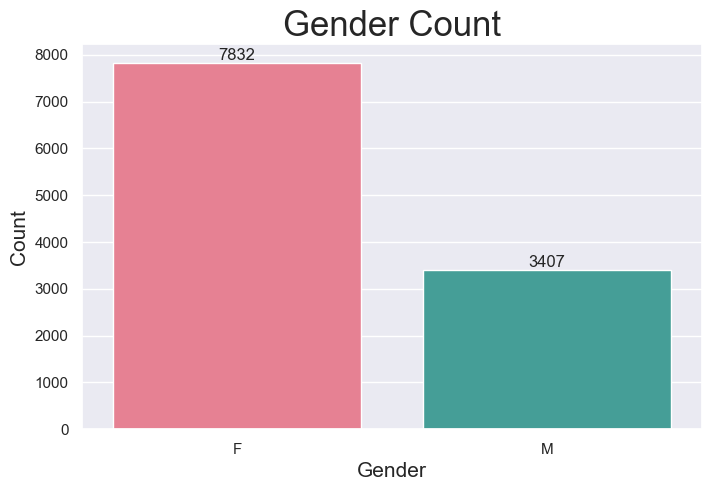

In [78]:
# plot a bar chart for its Gender and Count

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Gender', palette='husl')
plt.title('Gender Count', fontsize=25)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Count', fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars)

From the above visualization we can observe that the total count of Females outnumbers the count of Males.

Text(0, 0.5, 'Amount')

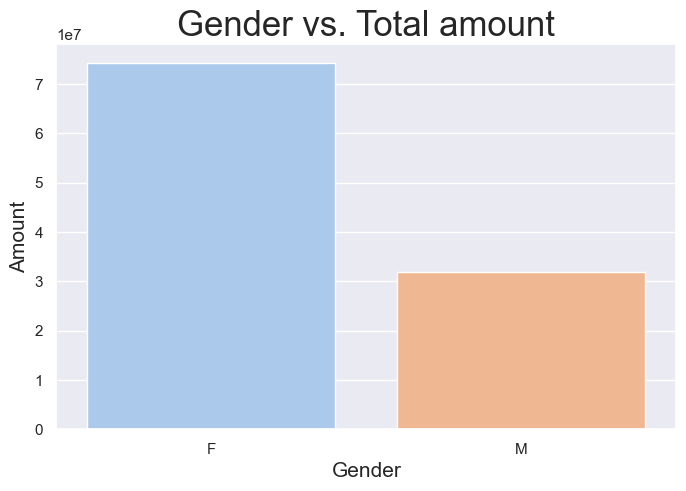

In [77]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Gender', y='Amount', data=sales_gen, palette='pastel', errorbar=None)
plt.title('Gender vs. Total amount', fontsize=25)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Amount', fontsize=15)

Amount spend by Females outnumbers the amount spent by Males.

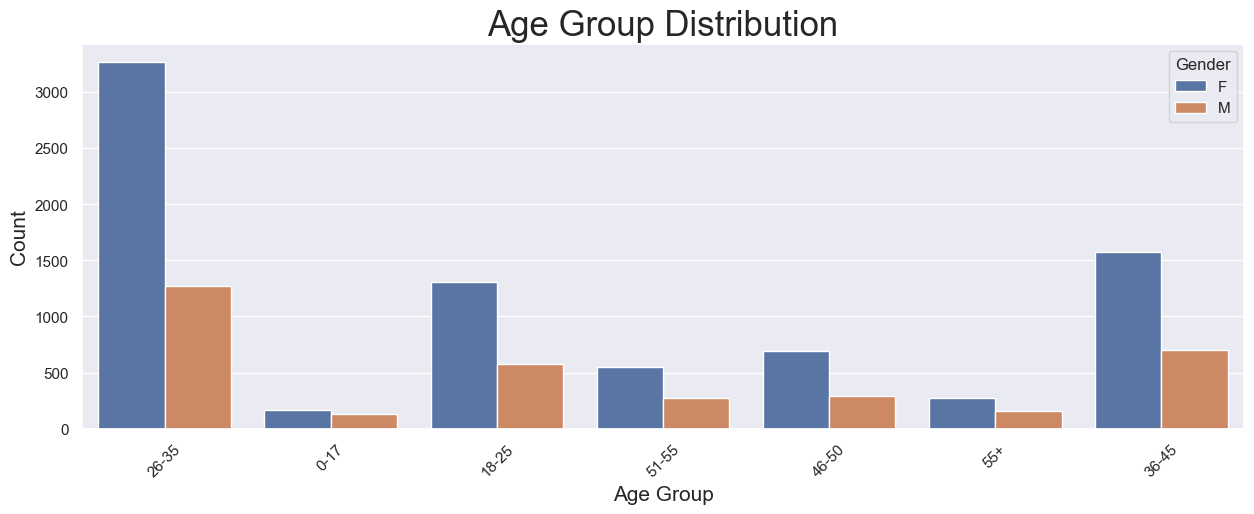

In [82]:
# plot count plot for Age Group

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df, x='Age Group', hue='Gender')
plt.title('Age Group Distribution', fontsize=25)
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45)
plt.show()

for bars in ax.containers:
    ax.bar_label(bars)

For the Age Group 26-35 we can observe that Females outnumbers the Male Count. OverAll the Females outnumbers the male counts. 

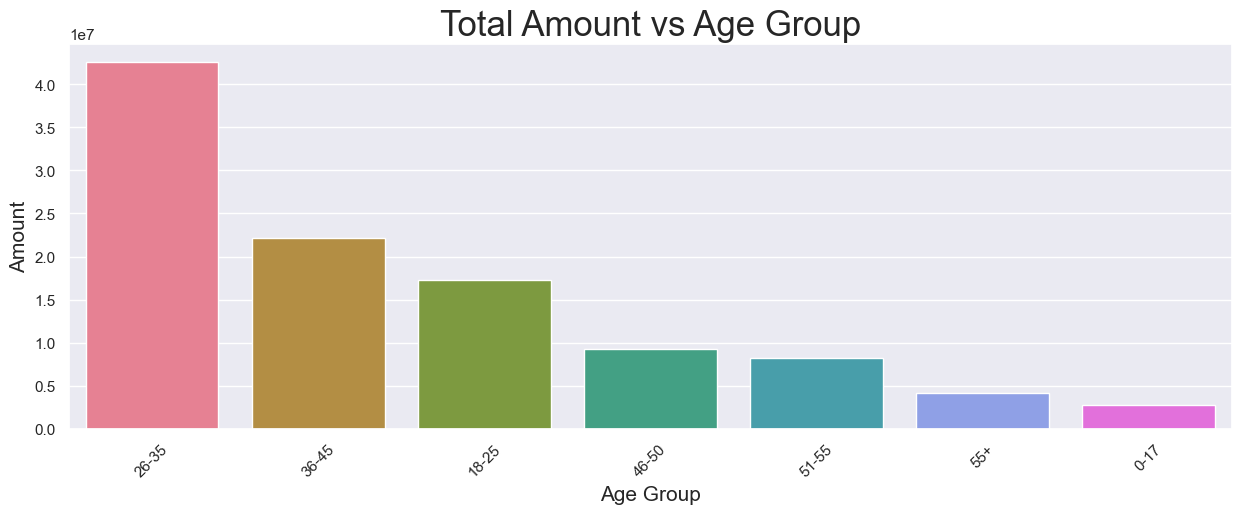

In [81]:
# Total amount vs Age Group 

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(data=sales_age, x='Age Group', y='Amount', palette='husl')
plt.title('Total Amount vs Age Group', fontsize=25)
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.xticks(rotation=45)
plt.show()

From the above visualization we can observe that the Age group 26-35 spents the most amount.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Kerala'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Gujarat')])

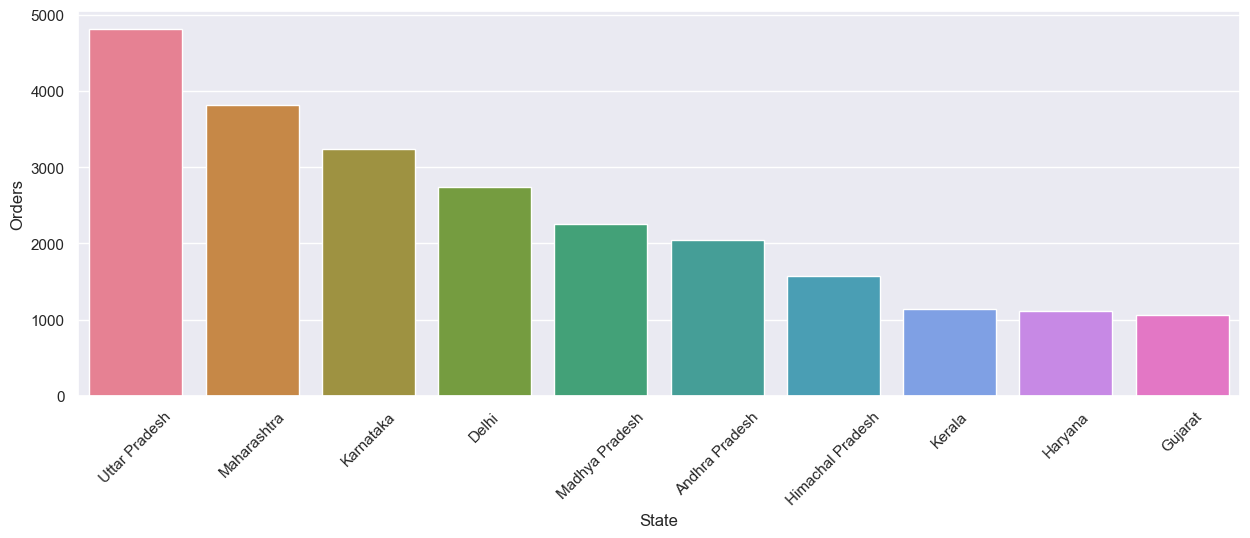

In [63]:
# Visualize total orders from Top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

plt.figure(figsize=(15, 5))
sns.barplot(data=sales_state, x='State', y='Orders', palette='husl')
plt.xticks(rotation=45)

From the above visualization we can observe that Uttar Pradesh, Maharastra and Karnataka are the top 3 states where we can see the major orders coming from.

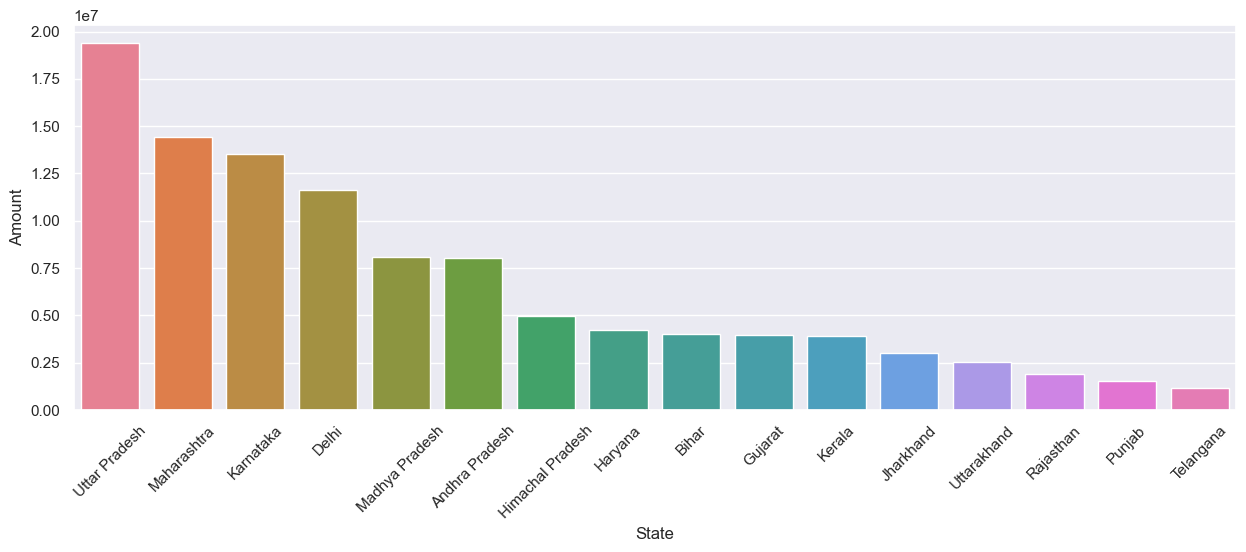

In [65]:
# Total Amount from the Top 10 States

amount_states = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(data=amount_states, x='State', y='Amount', palette='husl')
plt.xticks(rotation=45)
plt.show()

From the above visualization we can observe that the Total amount is spent is more in Uttar Pradesh, Maharastra and Karnataka.

# Marital Status

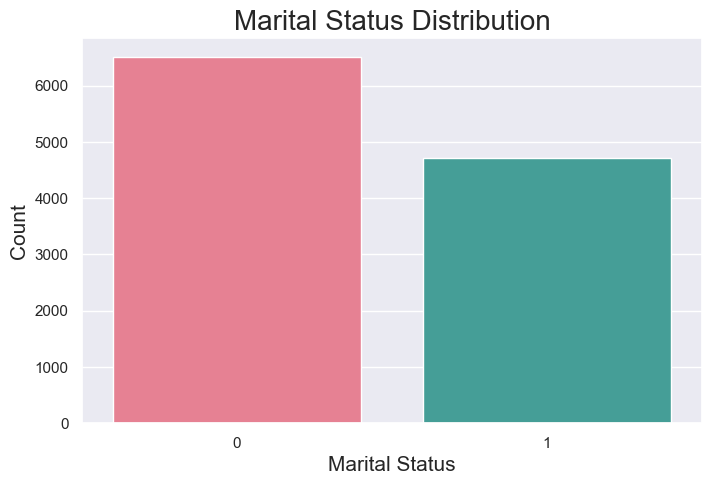

In [84]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Marital_Status', palette='husl')
plt.title('Marital Status Distribution', fontsize=20)
plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

for bars in ax.containers:
    ax.bar_label(bars)

From the above visualization we can observe that the count of unmarried buyers are high compared to married buyers.

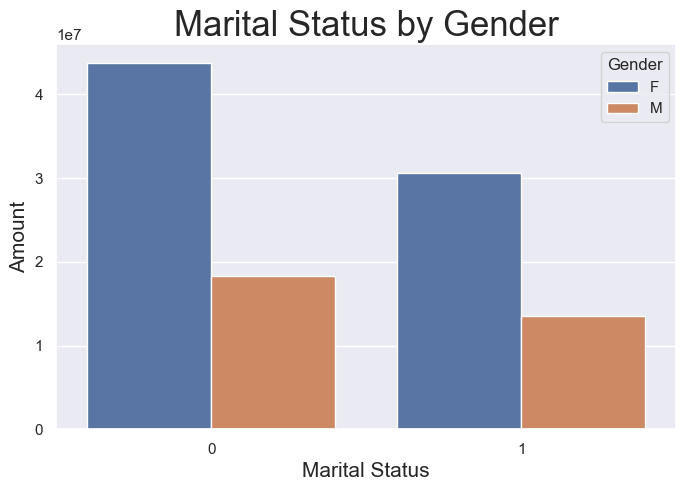

In [111]:
# Marital Status by Gender
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender', errorbar=None)
plt.title('Marital Status by Gender', fontsize=25)
plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.show()

The married women outperforms the married men in case of purchasing power

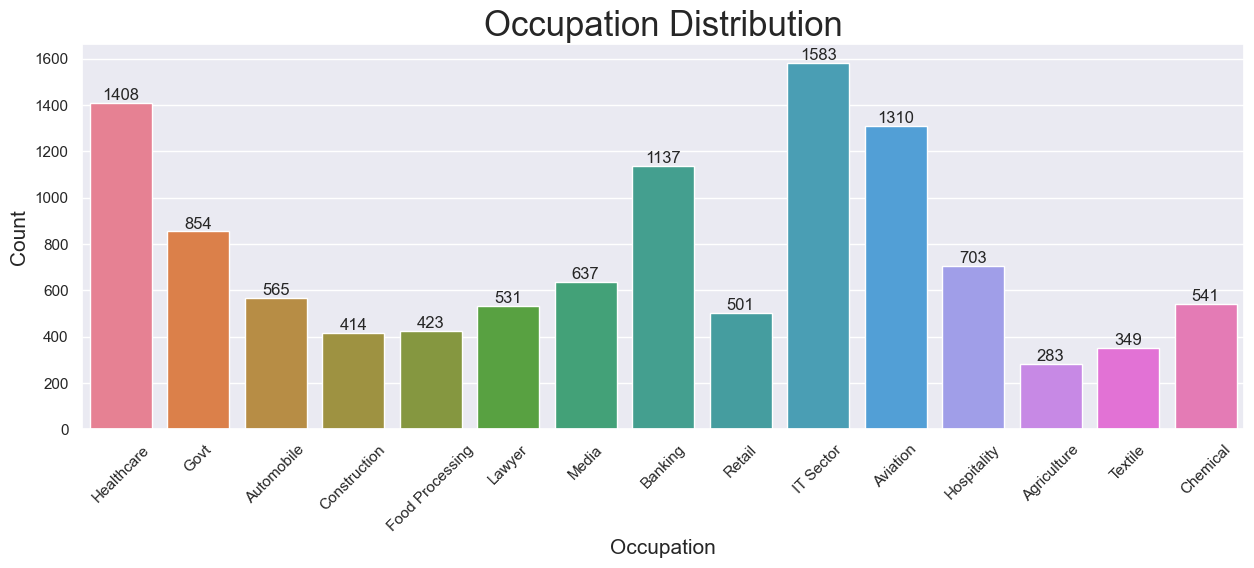

In [108]:
# Occupation
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df, x='Occupation', palette='husl')
plt.title('Occupation Distribution', fontsize=25)
plt.xlabel('Occupation', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45)

for bars in ax.containers:
    ax.bar_label(bars)

From the above visualization we observe that the most buyers are from IT Sector and Healthcare sector.

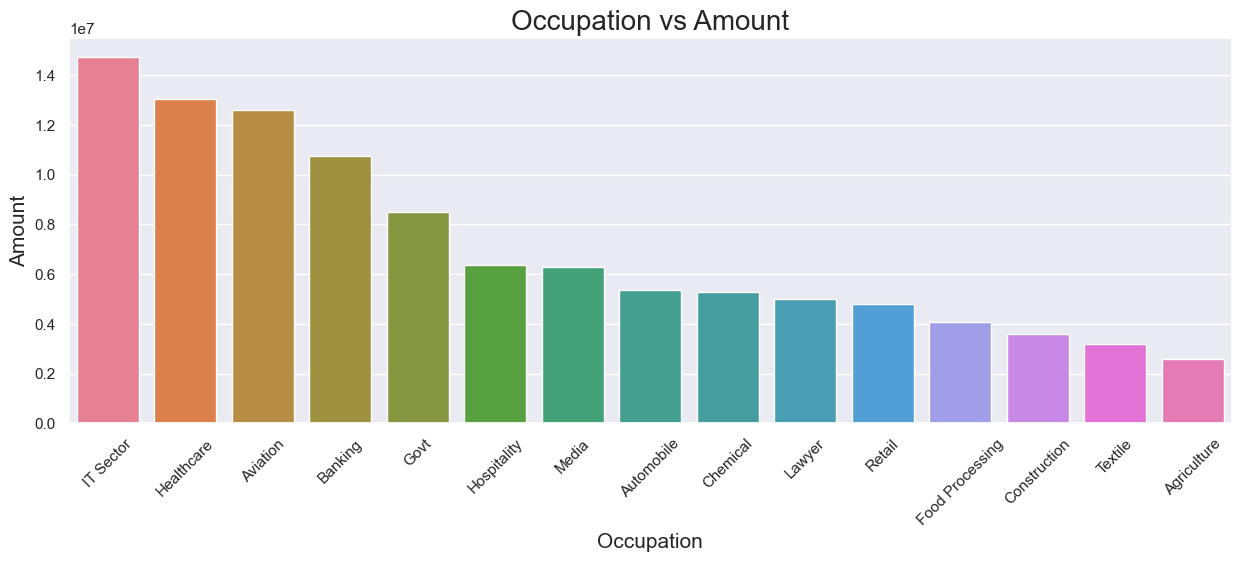

In [106]:
# Distribution of Occupation by Amount
df_occup = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(15, 5))
ax = sns.barplot(data=df_occup, x='Occupation', y='Amount', palette='husl')
plt.title('Occupation vs Amount', fontsize=20)
plt.xlabel('Occupation', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.xticks(rotation=45)
plt.show()

Most Amount of buyers are working in IT Sector, Healthcare and Aviation.

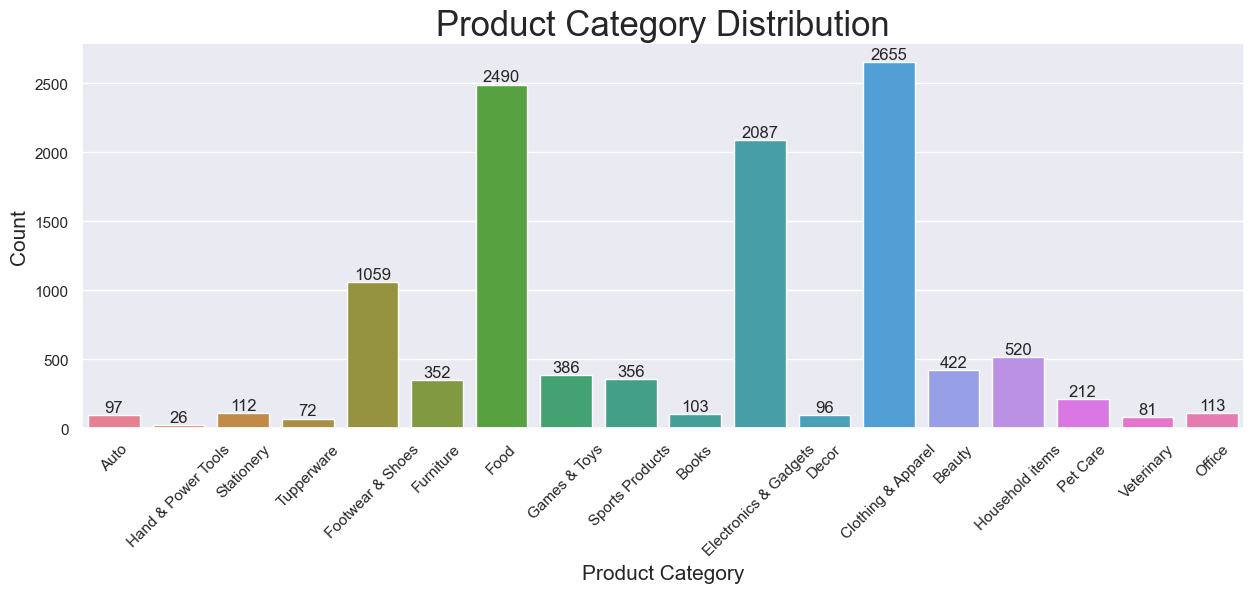

In [101]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df, x='Product_Category', palette='husl')
plt.title('Product Category Distribution', fontsize=25)
plt.xlabel('Product Category', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45)

for bars in ax.containers:
    ax.bar_label(bars)

We can observe from the above visualization that there are more number of Clothing and Apparel products, followed by Food and Electronics & Gadgets.

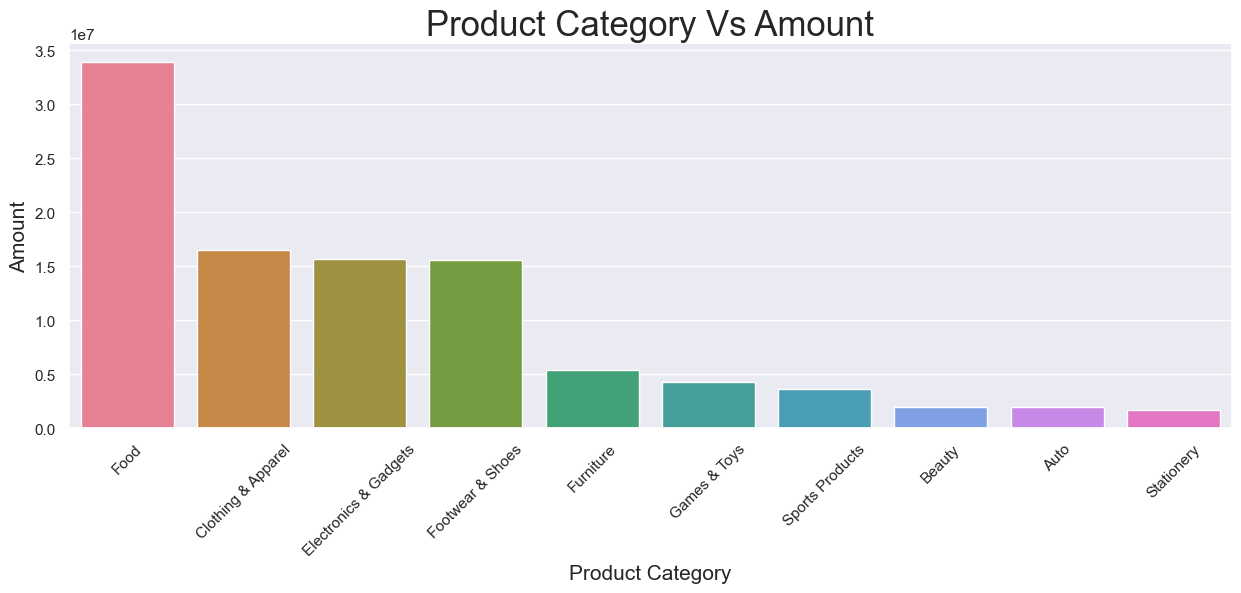

In [114]:
sale_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(15, 5))
sns.barplot(data=sale_state, x='Product_Category', y='Amount', palette='husl')
plt.title('Product Category Vs Amount', fontsize=25)
plt.xlabel('Product Category', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.xticks(rotation=45)
plt.show()

From the above visualization we can observe that Food, Clothing and Electronics are the most sold items. 

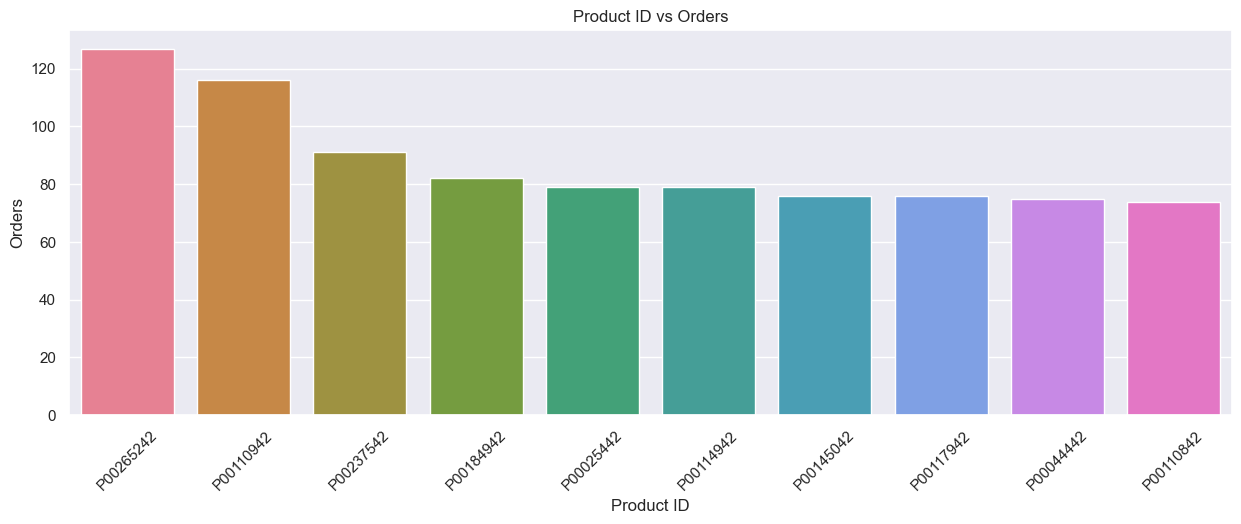

In [115]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

plt.figure(figsize=(15, 5))
sns.barplot(data=sales_state, x='Product_ID', y='Orders', palette='husl')
plt.title('Product ID vs Orders')
plt.xlabel('Product ID')
plt.ylabel('Orders')
plt.xticks(rotation=45)
plt.show()

Products P00265242, P00110942 & P00237542 have the most amount of orders.

<Axes: xlabel='Product_ID'>

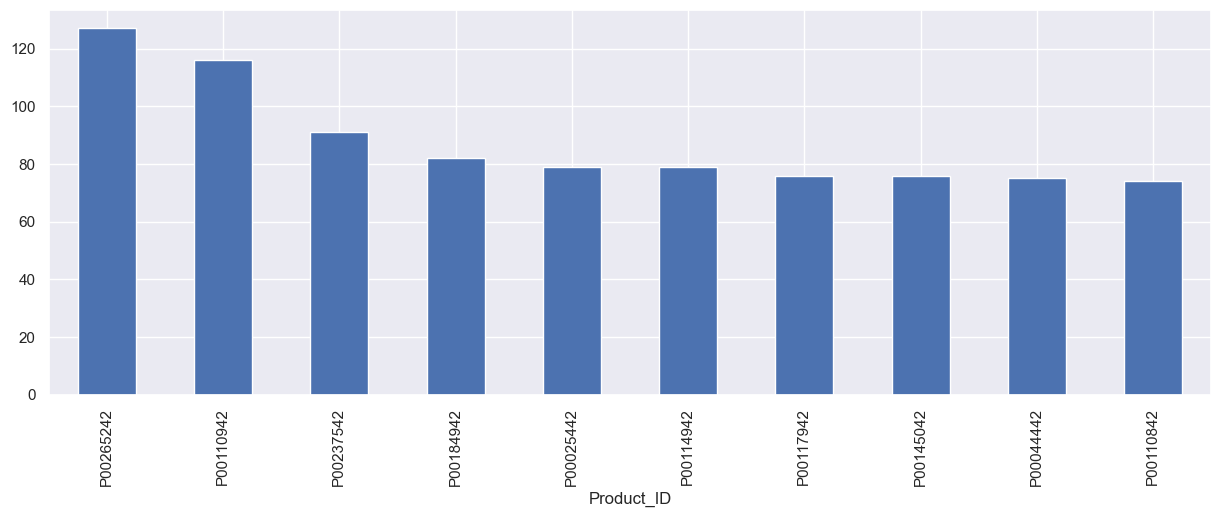

In [117]:
fig1, ax1 = plt.subplots(figsize=(15, 5))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Conclusion</title>
    <style>
        body {
            margin: 0;
            height: 100vh; /* Full viewport height */
            display: flex; /* Flexbox for centering */
            justify-content: center; /* Horizontally center the content */
            align-items: center; /* Vertically center the content */
            background-color: #f8f9fa; /* Light gray background for better visibility */
        }
        h1 {
            background-color: white; 
            color: black; 
            padding: 20px; /* Adds padding around the text */
            font-size: 3em; /* Adjust the font size for emphasis */
            font-weight: bold; /* Makes the text bold */
            border-radius: 10px; /* Rounded corners for the background */
            text-align: center; /* Center-align the text */
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); /* Optional: subtle shadow for better aesthetics */
        }
    </style>
</head>
<body>
    <h1><br>Conclusion<br></h1>
</body>
</html>

### Married Women age between 26-35 yrs old from Uttar Pradesh, Maharastra and Karnataka working in IT, healthcare and Aviation tends to buy more Food, Clothing and Electronics product items.